# A study on the trending videos of YouTube

This project studies the trending YouTube videos in the US using the datasets fromn Kaggle.https://www.kaggle.com/datasnaek/youtube-new


In [7]:
# import libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

# import the dataset
video_df = pd.read_csv("USvideos.csv",parse_dates=['trending_date','publish_time'])
video_df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13 17:13:01+00:00,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13 07:30:00+00:00,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12 19:05:24+00:00,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13 11:00:04+00:00,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12 18:01:41+00:00,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [8]:
# read the category json file and normalize it as pd DataFrame
import json
from collections import defaultdict 

with open('US_category_id.json') as json_file:
    category = json.load(json_file)

    
cat = defaultdict(int)
for i in range(len(category['items'])):
    cat[category['items'][i]['id']] = category['items'][i]['snippet']['title']

cat_df = pd.DataFrame({'category_id':list(cat.keys()), 'category':list(cat.values())})
# convert the category_id column to integer so it can be joined with video_df
cat_df["category_id"] = pd.to_numeric(cat_df["category_id"])
cat_df.head()

,category_id,category
0,1,Film & Animation
1,2,Autos & Vehicles
2,10,Music
3,15,Pets & Animals
4,17,Sports


In [9]:
# merge cat_df with video_df
df = video_df.merge(cat_df, on="category_id")
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13 17:13:01+00:00,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs
1,0mlNzVSJrT0,17.14.11,Me-O Cats Commercial,Nobrand,22,2017-04-21 06:47:32+00:00,"cute|""cats""|""thai""|""eggs""",98966,2486,184,532,https://i.ytimg.com/vi/0mlNzVSJrT0/default.jpg,False,False,False,Kittens come out of the eggs in a Thai commerc...,People & Blogs
2,STI2fI7sKMo,17.14.11,"AFFAIRS, EX BOYFRIENDS, $18MILLION NET WORTH -...",Shawn Johnson East,22,2017-11-11 15:00:03+00:00,"shawn johnson|""andrew east""|""shawn east""|""shaw...",321053,4451,1772,895,https://i.ytimg.com/vi/STI2fI7sKMo/default.jpg,False,False,False,Subscribe for weekly videos ▶ http://bit.ly/sj...,People & Blogs
3,KODzih-pYlU,17.14.11,BLIND(folded) CAKE DECORATING CONTEST (with Mo...,Grace Helbig,22,2017-11-11 18:08:04+00:00,"itsgrace|""funny""|""comedy""|""vlog""|""grace""|""helb...",197062,7250,217,456,https://i.ytimg.com/vi/KODzih-pYlU/default.jpg,False,False,False,Molly is an god damn amazing human and she cha...,People & Blogs
4,8mhTWqWlQzU,17.14.11,Wearing Online Dollar Store Makeup For A Week,Safiya Nygaard,22,2017-11-11 01:19:33+00:00,wearing online dollar store makeup for a week|...,2744430,115426,1110,6541,https://i.ytimg.com/vi/8mhTWqWlQzU/default.jpg,False,False,False,I found this online dollar store called ShopMi...,People & Blogs


In [10]:
# check if there's any column that has lots of missing values
df.isnull().sum()

video_id                    0
trending_date               0
title                       0
channel_title               0
category_id                 0
publish_time                0
tags                        0
views                       0
likes                       0
dislikes                    0
comment_count               0
thumbnail_link              0
comments_disabled           0
ratings_disabled            0
video_error_or_removed      0
description               570
category                    0
dtype: int64

In [11]:
# refprmat the "trending_date" column as date
import re
df['trending_date'] = df['trending_date'].apply(lambda x: re.sub("\.","-",x))
df['trending_date'] = pd.to_datetime(df['trending_date'], format="%y-%d-%m")

# Which categories have the most trending videos?

In [12]:
# find the top 10 categories with the most trending videos
top_10 = df.groupby("category")["video_id"].count().sort_values(ascending = False)[:10]

/Users/siruihua/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Category')

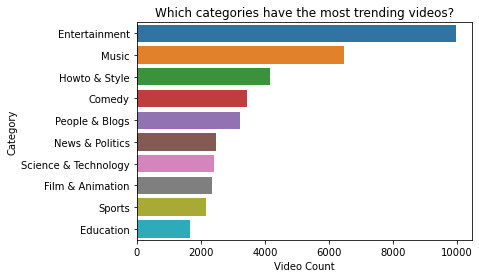

In [13]:
# draw a barplot of the top 10 categories
ax = sns.barplot(top_10.values, top_10.index)
ax.set_title("Which categories have the most trending videos?")
ax.set_xlabel("Video Count")
ax.set_ylabel("Category")

# How long does it take for the video to be trending?
- 

In [14]:
# create new column for days to trending and convert it to integer
df['dayt_to_trending'] = df['trending_date'].dt.date - df['publish_time'].dt.date
df['dayt_to_trending'] = df['dayt_to_trending'].dt.days

Text(0, 0.5, 'Video Count')

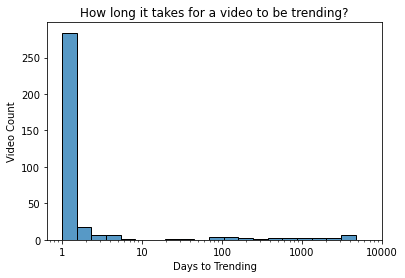

In [15]:
# Create the histogram for the distrobution of the 
import matplotlib as mpl
ax = sns.histplot(df['dayt_to_trending'].value_counts(), bins = 20, log_scale=True)
ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
ax.set_xticks([1, 10, 100, 1000, 10000])
ax.set_title("How long it takes for a video to be trending?")
ax.set_xlabel("Days to Trending")
ax.set_ylabel("Video Count")

# Build a machine learning to predict the video views

In [16]:
# create a new feature: like_rate
df["like_rate"] = df["likes"]/(df["likes"] + df["dislikes"])

<AxesSubplot:>

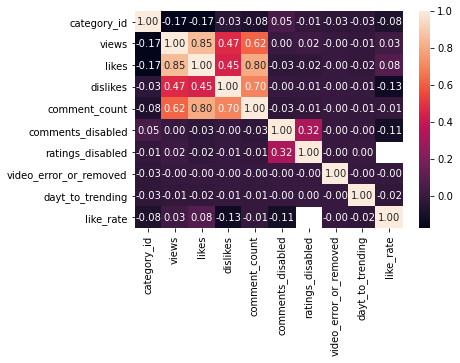

In [17]:
# create a heatmap to check the correlation between different variables
sns.heatmap(df.corr(), annot=True, fmt=".2f")

In [18]:
def create_dummy_df(df, cat_cols, dummy_na):
    '''
    INPUT:
    df - pandas dataframe with categorical variables you want to dummy
    cat_cols - list of strings that are associated with names of the categorical columns
    dummy_na - Bool holding whether you want to dummy NA vals of categorical columns or not
    
    OUTPUT:
    df - a new dataframe that has the following characteristics:
            1. contains all columns that were not specified as categorical
            2. removes all the original columns in cat_cols
            3. dummy columns for each of the categorical columns in cat_cols
            4. if dummy_na is True - it also contains dummy columns for the NaN values
            5. Use a prefix of the column name with an underscore (_) for separating 
    '''
    for col in  cat_cols:
        try:
            # for each cat add dummy var, drop original column
            df = pd.concat([df.drop(col, axis=1), pd.get_dummies(df[col], prefix=col, prefix_sep='_', drop_first=True, dummy_na=dummy_na)], axis=1)
        except:
            continue
    return df

In [19]:
df = create_dummy_df(df, ["category"], dummy_na=False)

In [20]:
df_cleaned = df.drop(columns=['video_id', 'publish_time', 'trending_date', 'title', 'channel_title', 'category_id', 'tags', 'thumbnail_link', 'description'])

In [21]:
df_cleaned = df_cleaned.fillna(0)

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
X = df_cleaned.drop(columns = ["views"])
y = df_cleaned["views"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42) 
lm_model = LinearRegression(normalize=True) # Instantiate
lm_model.fit(X_train, y_train) #Fit
        
#Predict and score the model
y_test_preds = lm_model.predict(X_test) 
"The r-squared score for the model using only quantitative variables was {} on {} values.".format(r2_score(y_test, y_test_preds), len(y_test))

'The r-squared score for the model using only quantitative variables was 0.7990287048923883 on 12285 values.'